In [1]:
import cv2
import numpy as np
from skimage import data
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

(491, 770, 3)


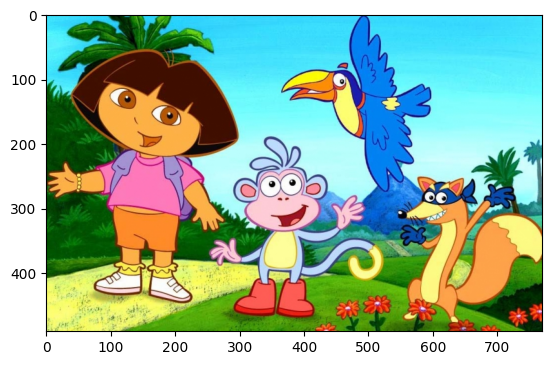

In [6]:
#image = data.retina()
#image = data.astronaut()
image = imread(fname="dora.jpg")

print(image.shape)
plt.imshow(image)

In [7]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
# defining the range of masking 
blue1 = np.array([110, 50, 50]) 
blue2 = np.array([130, 255, 255]) 
      
# initializing the mask to be 
# convoluted over input image 
mask = cv2.inRange(hsv, blue1, blue2) 
  
# passing the bitwise_and over 
# each pixel convoluted 
res = cv2.bitwise_and(image, image, mask = mask) 
      
# defining the kernel i.e. Structuring element 
kernel = np.ones((5, 5), np.uint8) 
      
# defining the opening function  
# over the image and structuring element 
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

Text(0.5, 1.0, 'Citra Input 2')

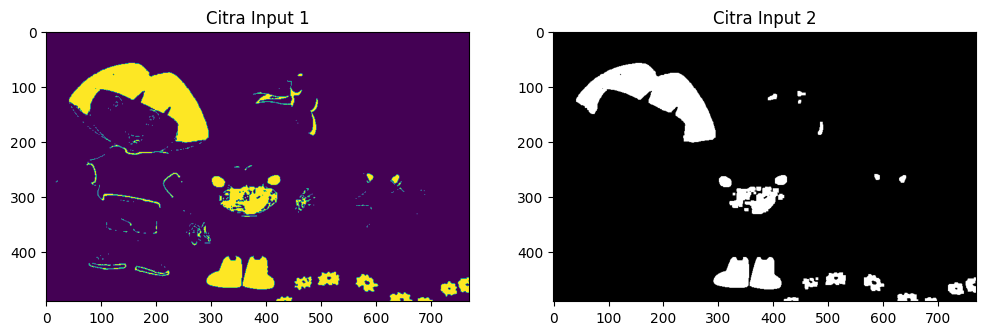

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(mask)
ax[0].set_title("Citra Input 1")

ax[1].imshow(opening, cmap='gray')
ax[1].set_title('Citra Input 2')

In [ ]:
# return video from the first webcam on your computer.   
screenRead = cv2.VideoCapture(0) 
  
# loop runs if capturing has been initialized. 
while(1): 
    # reads frames from a camera 
    _, image = screenRead.read() 
      
    # Converts to HSV color space, OCV reads colors as BGR  
    # frame is converted to hsv 
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
      
    # defining the range of masking 
    blue1 = np.array([110, 50, 50]) 
    blue2 = np.array([130, 255, 255]) 
      
    # initializing the mask to be 
    # convoluted over input image 
    mask = cv2.inRange(hsv, blue1, blue2) 
  
    # passing the bitwise_and over 
    # each pixel convoluted 
    res = cv2.bitwise_and(image, image, mask = mask) 
      
    # defining the kernel i.e. Structuring element 
    kernel = np.ones((5, 5), np.uint8) 
      
    # defining the opening function  
    # over the image and structuring element 
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
     
    # The mask and opening operation 
    # is shown in the window  
    cv2.imshow('Mask', mask) 
    cv2.imshow('Opening', opening) 
      
    # Wait for 'a' key to stop the program  
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break

# De-allocate any associated memory usage   
cv2.destroyAllWindows() 
  
# Close the window / Release webcam  
screenRead.release()